In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from graphviz import Digraph

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score,precision_score,f1_score,classification_report
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(5)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [5]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
Number_of_columns = len(data.columns)
Number_of_columns

18

In [7]:
for i in list(data.columns):    
    n = data[i].unique()
    
    if len(n)<15:
        print(i)
        print(n)
    else:
        print(i + ': ' +str(len(n)) + ' unique values')

Id: 45211 unique values
age: 80 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance: 7169 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day: 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: 1573 unique values
campaign: 48 unique values
pdays: 559 unique values
previous: 41 unique values
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [8]:
#feature engineering

#Numerical features
num_cols = ['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#Categorical features
cat_cols = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome']

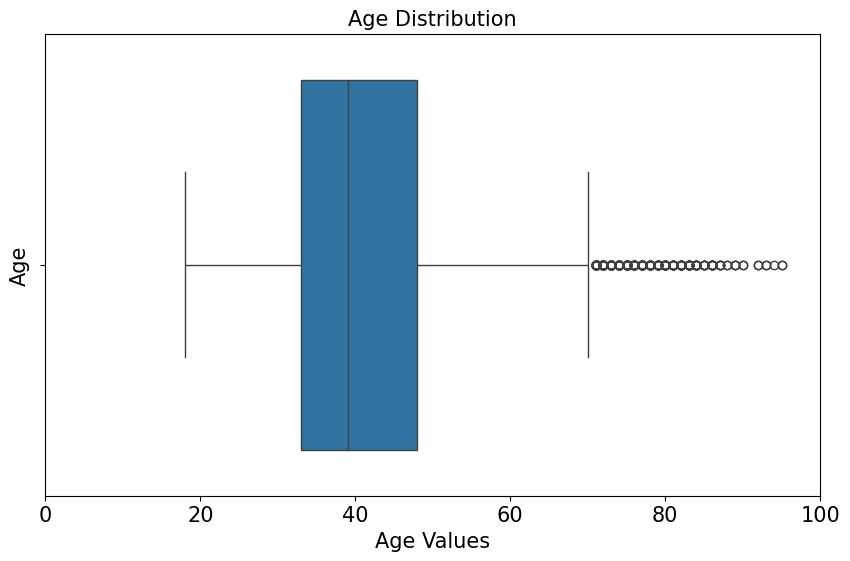

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = 'age', data = data[num_cols], orient = 'h')

ax.set_xlabel('Age Values', fontsize=15)
ax.set_ylabel('Age', fontsize=15) 
ax.set_title('Age Distribution', fontsize=15)

ax.tick_params(labelsize=15)
ax.set_xlim(0, 100)

plt.show()

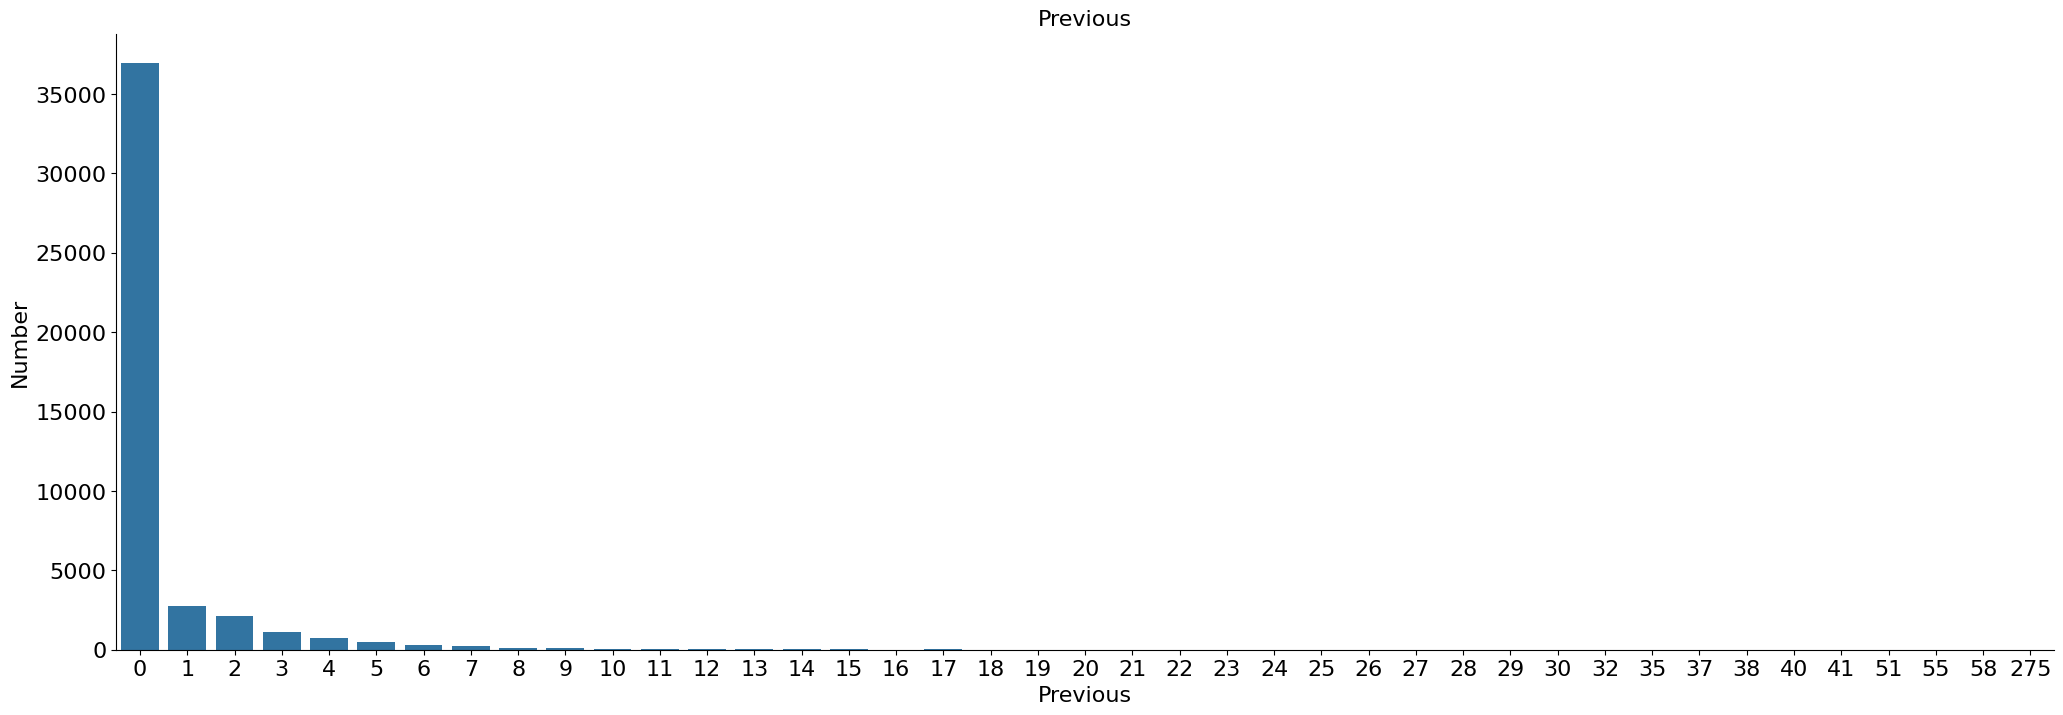

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = data[num_cols])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

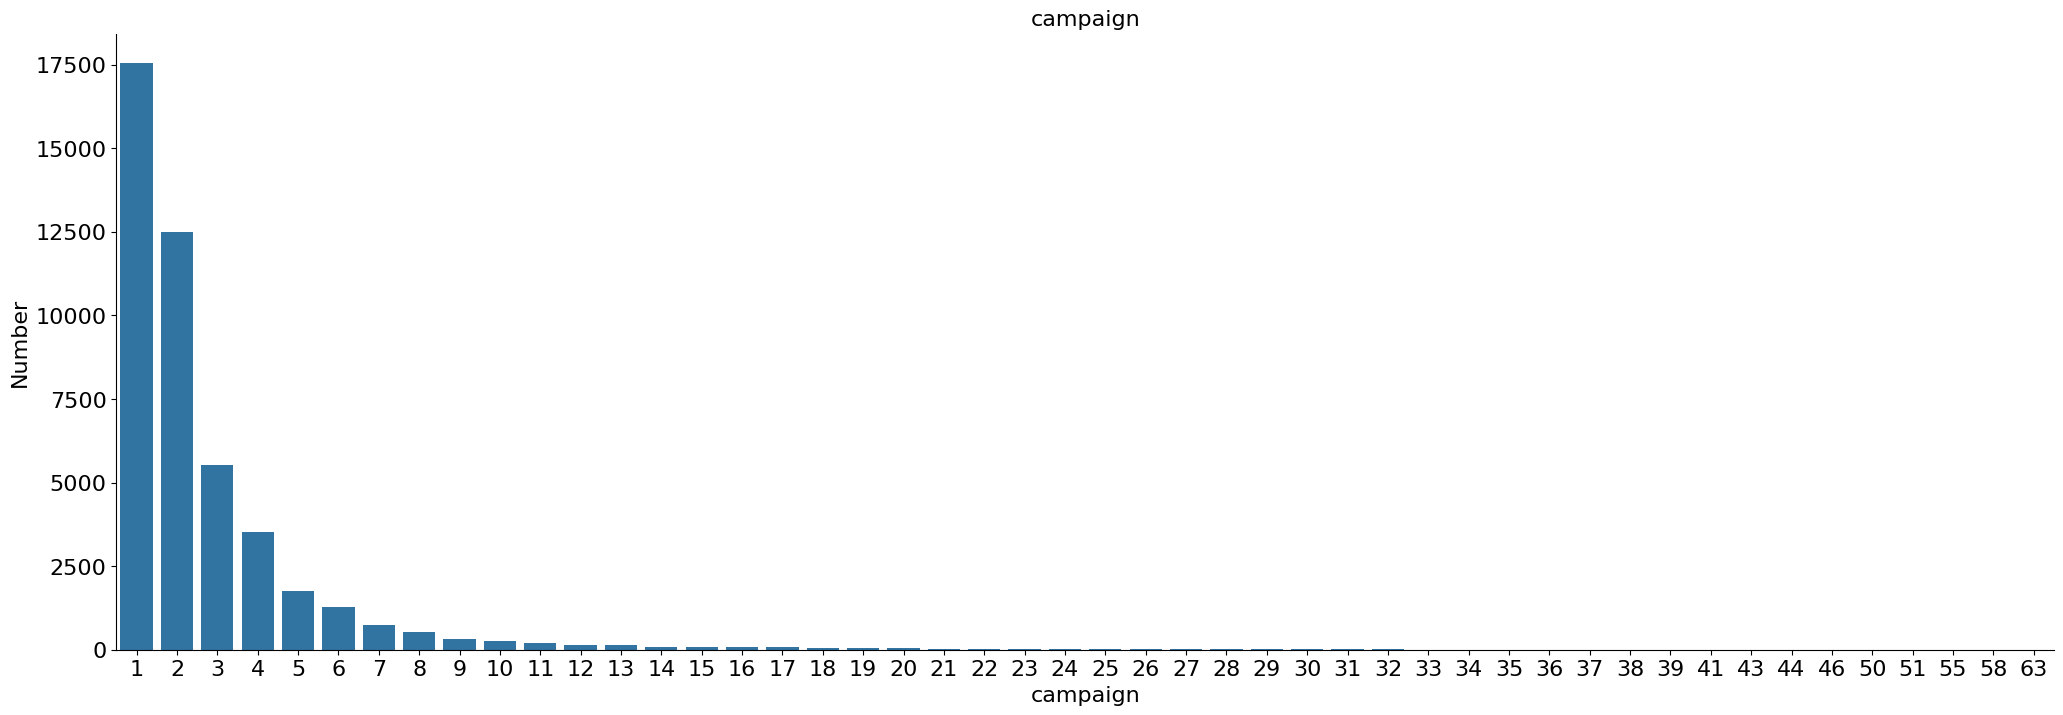

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'campaign', data = data[num_cols])
ax.set_xlabel('campaign', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('campaign', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

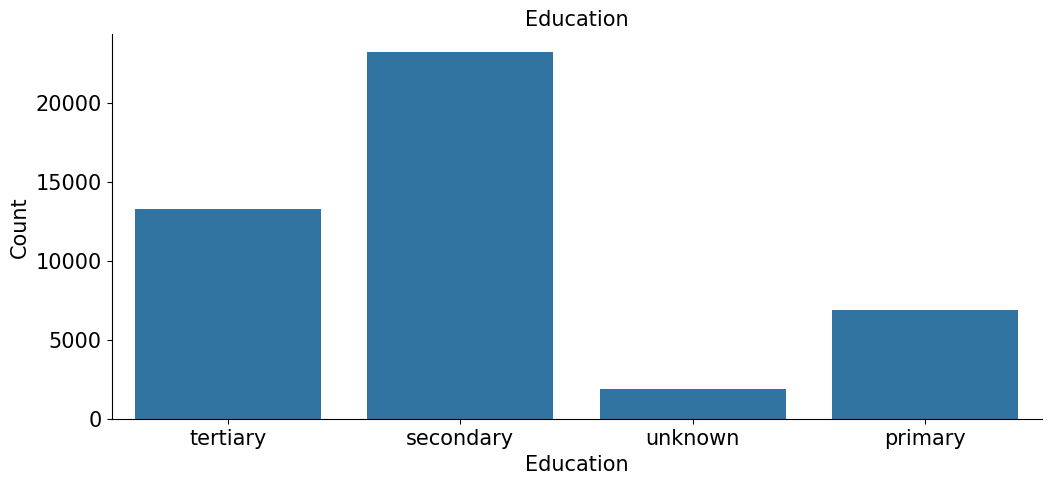

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'education', data = data[cat_cols])
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

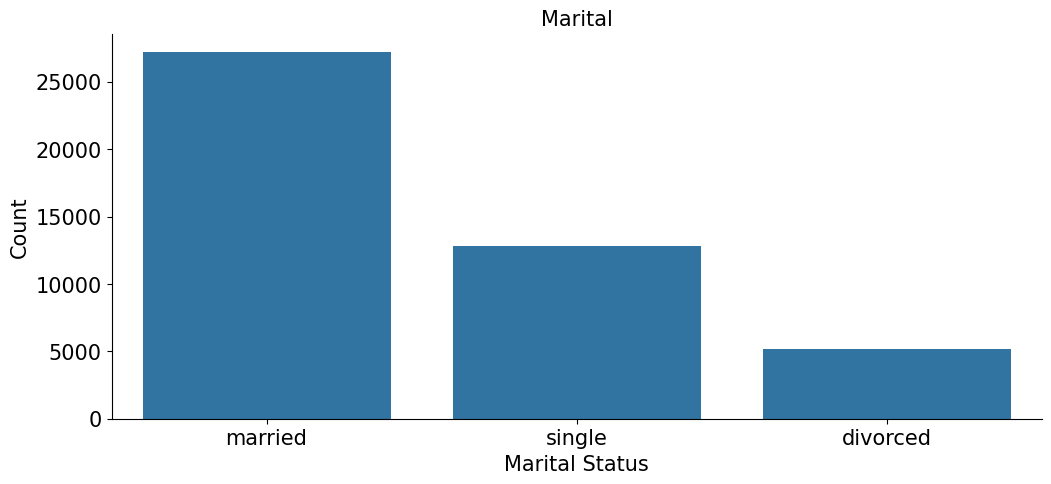

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.countplot(x = 'marital', data = data[cat_cols])
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

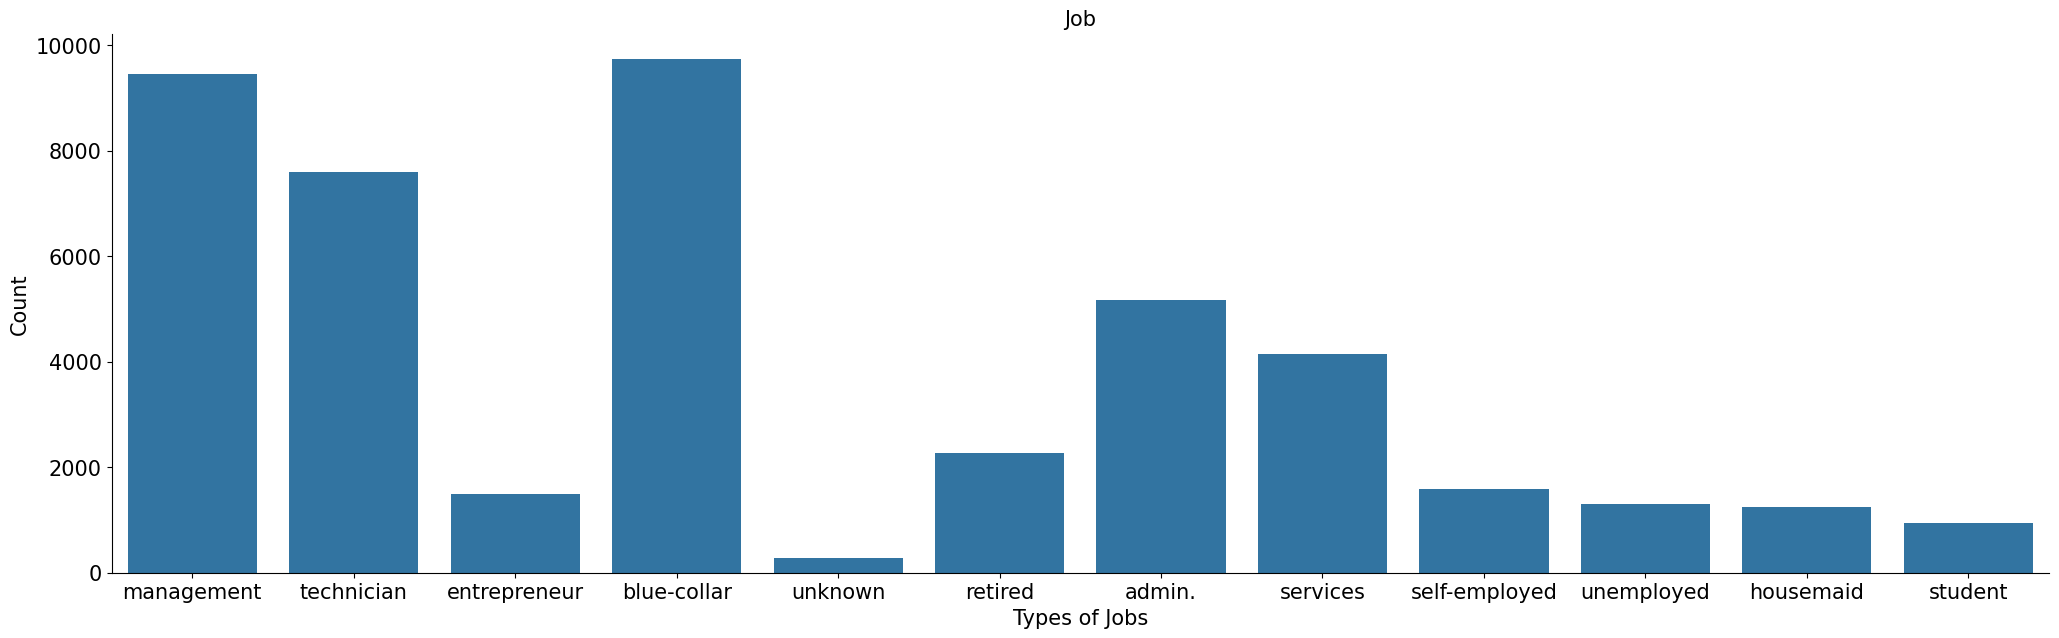

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 7)
sns.countplot(x = 'job', data = data[cat_cols])
ax.set_xlabel('Types of Jobs', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

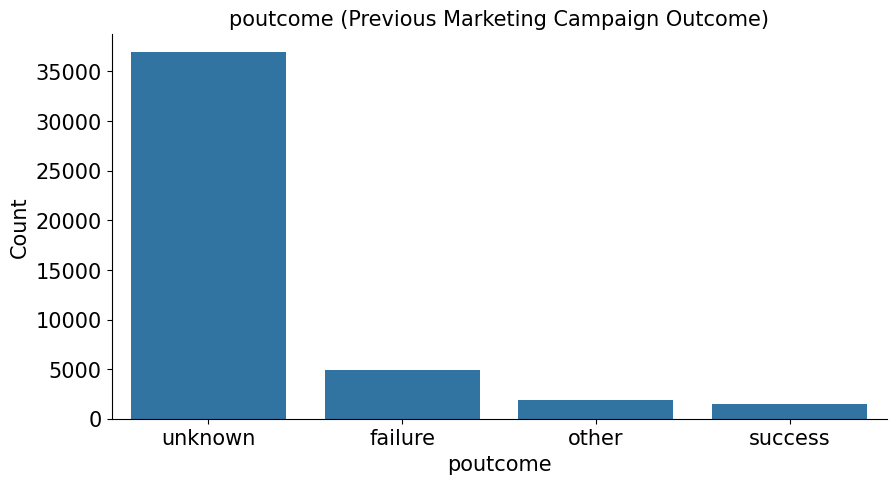

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'poutcome', data = data[cat_cols])
ax.set_xlabel('poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

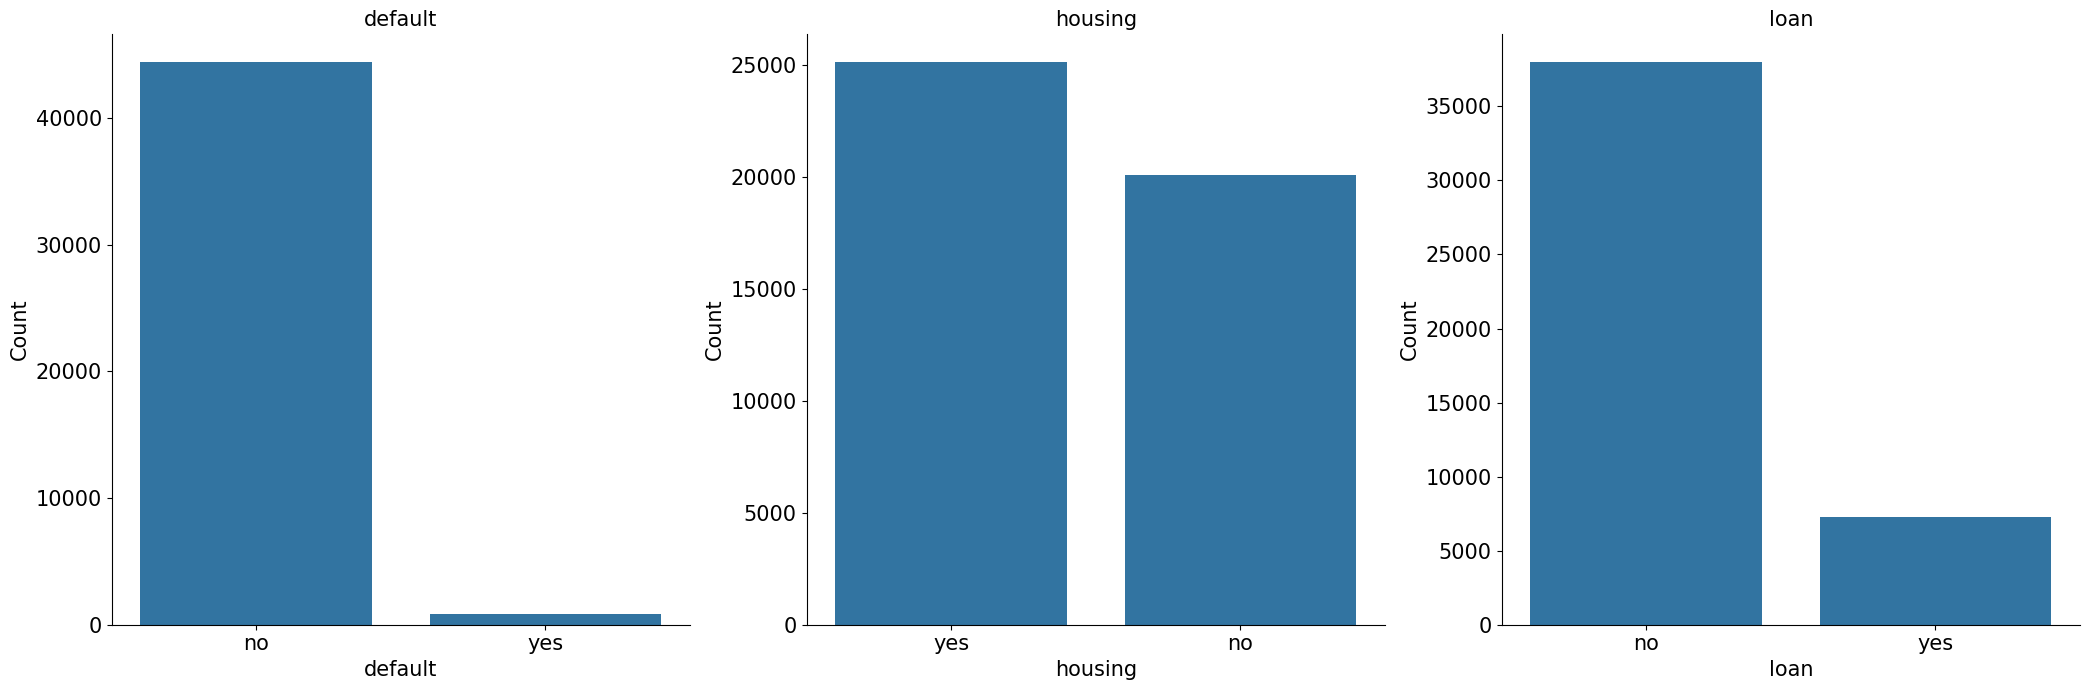

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

for i, col in enumerate(['default', 'housing', 'loan']):
    sns.countplot(x=col, data=data[cat_cols], ax=axes[i])
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)
    axes[i].set_title(col, fontsize=15)
    axes[i].tick_params(labelsize=15)
    sns.despine()

plt.tight_layout()
plt.show()

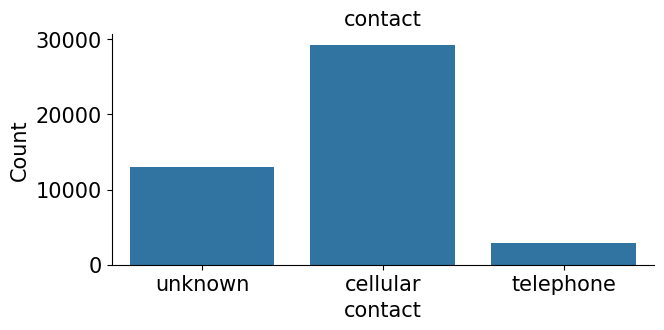

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 3)
sns.countplot(x = 'contact', data = data[cat_cols])
ax.set_xlabel('contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('contact', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

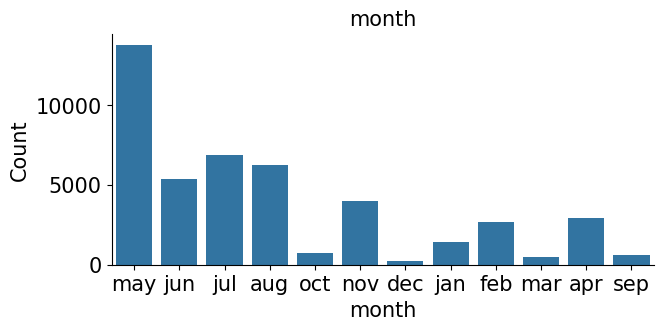

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 3)
sns.countplot(x = 'month', data = data[cat_cols])
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('month', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [19]:
x_not_hot=data.drop(['y'], axis=1)
x_not_hot

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown


In [20]:
y_not_hot = data
y = y_not_hot['y'].map({'yes': 1, 'no': 0})
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [21]:
X=pd.get_dummies(x_not_hot[cat_cols],drop_first = False).astype(int)
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
null_values = data.isnull().sum()
null_values

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
data = data.dropna()

In [24]:
null_values = data.isnull().sum()
null_values

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='y'>

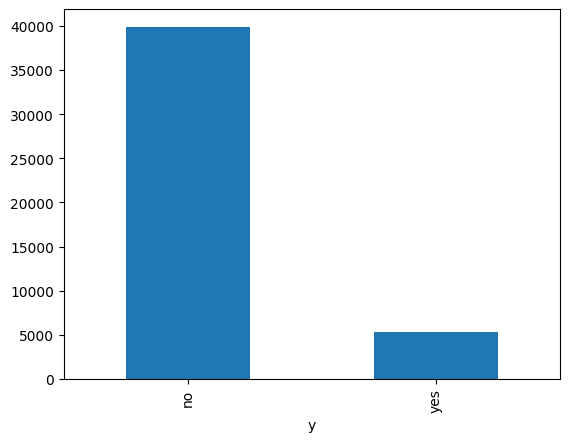

In [25]:
data.y.value_counts().plot(kind='bar')

In [26]:
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        #decision node
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        #leaf node
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [27]:
class DecisionTree():
    def __init__(self, min_samples=2, max_depth=2):
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):

        left_dataset = []
        right_dataset = []
        
        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):

        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):

        information_gain = 0
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):

        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):

        #Calculates the most occurring value in the given list of y values.

        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def build_tree(self, dataset, current_depth=0):

        #Recursively builds a decision tree from the given dataset.

        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    def fit(self, X, y):
        
        y = y.reshape(-1, 1)
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)

    def predict(self, X):
        
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    def make_prediction(self, x, node):

        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

    def plot_tree(self, dot_file_path='decision_tree_graph'):
        dot = Digraph(comment='Decision Tree')
        queue = [(self.root, 0)]
        while queue:
            current_node, current_node_id = queue.pop(0)
            if current_node.is_leaf_node():
                dot.node(str(current_node_id), label=str(current_node.value), shape='ellipse')
            else:
                dot.node(str(current_node_id), label=str(current_node.feature))
                if current_node.left:
                    left_id = current_node_id * 2 + 1
                    dot.edge(str(current_node_id), str(left_id), label='<= ' + str(current_node.threshold))
                    queue.append((current_node.left, left_id))
                if current_node.right:
                    right_id = current_node_id * 2 + 2
                    dot.edge(str(current_node_id), str(right_id), label='> ' + str(current_node.threshold))
                    queue.append((current_node.right, right_id))
        dot.render(dot_file_path, format='png', cleanup=True)
        return dot

In [28]:
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

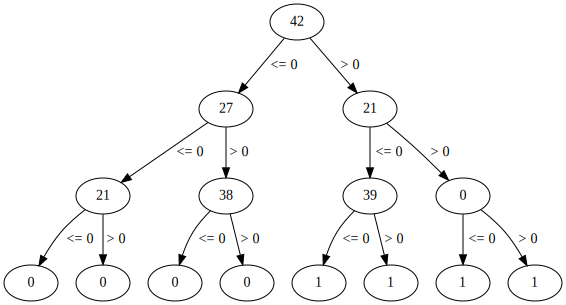

In [29]:
clf = DecisionTree()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
clf.plot_tree()

In [30]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred)/len(y_test)

In [31]:
acc = accuracy(y_test, prediction)
print(acc)

0.8854362490324007


In [34]:
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.11456375096759924
